In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [2]:
trials=100_00_00     #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [3]:
x

array([-0.15103317,  0.69238435, -0.63809531, ..., -0.76776304,
       -0.23513601, -0.30135459])

In [4]:
y

array([ 0.59069101, -0.6165882 , -0.69003792, ..., -0.69681687,
        0.84719007,  0.83401731])

In [5]:
z

array([-0.33291622,  0.3023017 ,  0.57587169, ...,  0.36177046,
       -0.79999474,  0.09970019])

In [6]:

r=np.sqrt(x**2+y**2+z**2)
r

array([0.69466546, 0.97517353, 1.10224596, ..., 1.09813101, 1.18870162,
       0.89237861])

In [7]:
test=np.column_stack((test,r))

In [8]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,-0.151033,0.590691,-0.332916,0.694665
1,0.692384,-0.616588,0.302302,0.975174
2,-0.638095,-0.690038,0.575872,1.102246
3,0.841370,0.841320,0.767085,1.415677
4,-0.983489,0.803275,-0.833982,1.519219


In [9]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65599

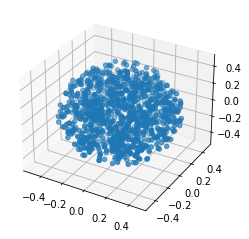

In [10]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [11]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5 #z_up, z
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [12]:
#distance travelled in the bead
df_less_copy=df_less.copy()

df_less_copy.loc[:,'z_new']=df_less_copy.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less_copy.loc[:,'d_bead']=df_less_copy.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead
22,0.189109,-0.030261,-0.129244,0.231045,0.462756,0.592
46,-0.033444,-0.086498,0.318726,0.331944,0.491726,0.173
54,-0.408892,0.173625,0.225270,0.498081,0.230270,0.005
58,0.205031,-0.034943,0.379865,0.433077,0.454865,0.075
64,0.381947,0.255347,-0.022189,0.459976,0.197811,0.220


In [13]:
#distance travelled in the button
button_thickness=3.0
df_less_copy.loc[:,'d_button']=button_thickness/2.-df_less_copy.loc[:,'z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button
22,0.189109,-0.030261,-0.129244,0.231045,0.462756,0.592,1.037244
46,-0.033444,-0.086498,0.318726,0.331944,0.491726,0.173,1.008274
54,-0.408892,0.173625,0.225270,0.498081,0.230270,0.005,1.269730
58,0.205031,-0.034943,0.379865,0.433077,0.454865,0.075,1.045135
64,0.381947,0.255347,-0.022189,0.459976,0.197811,0.220,1.302189


In [14]:
#changing mm to cm
mm_to_cm=0.1
df_less_copy=df_less_copy*mm_to_cm
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button
22,0.018911,-0.003026,-0.012924,0.023104,0.046276,0.0592,0.103724
46,-0.003344,-0.008650,0.031873,0.033194,0.049173,0.0173,0.100827
54,-0.040889,0.017363,0.022527,0.049808,0.023027,0.0005,0.126973
58,0.020503,-0.003494,0.037986,0.043308,0.045486,0.0075,0.104514
64,0.038195,0.025535,-0.002219,0.045998,0.019781,0.0220,0.130219


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [15]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [16]:
#adding the transmississin though button
df_less_copy.loc[:,'button_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less_copy.loc[:,'button_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
22,0.018911,-0.003026,-0.012924,0.023104,0.046276,0.0592,0.103724,0.979706,0.981137
46,-0.003344,-0.008650,0.031873,0.033194,0.049173,0.0173,0.100827,0.980267,0.981659
54,-0.040889,0.017363,0.022527,0.049808,0.023027,0.0005,0.126973,0.975214,0.976959
58,0.020503,-0.003494,0.037986,0.043308,0.045486,0.0075,0.104514,0.979553,0.980995
64,0.038195,0.025535,-0.002219,0.045998,0.019781,0.0220,0.130219,0.974588,0.976377


In [17]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [18]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less_copy.loc[:,'bead_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less_copy.loc[:,'bead_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am
22,0.018911,-0.003026,-0.012924,0.023104,0.046276,0.0592,0.103724,0.979706,0.981137,0.952913,0.965671
46,-0.003344,-0.008650,0.031873,0.033194,0.049173,0.0173,0.100827,0.980267,0.981659,0.986004,0.989844
54,-0.040889,0.017363,0.022527,0.049808,0.023027,0.0005,0.126973,0.975214,0.976959,0.999593,0.999705
58,0.020503,-0.003494,0.037986,0.043308,0.045486,0.0075,0.104514,0.979553,0.980995,0.993908,0.995584
64,0.038195,0.025535,-0.002219,0.045998,0.019781,0.0220,0.130219,0.974588,0.976377,0.982236,0.987102


In [19]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less_copy['prob_product_pb']=df_less_copy['button_transmission_prob_pb']*df_less_copy['bead_transmission_prob_pb']
df_less_copy['prob_product_am']=df_less_copy['button_transmission_prob_am']*df_less_copy['bead_transmission_prob_am']
df_less_copy.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
22,0.018911,-0.003026,-0.012924,0.023104,0.046276,0.0592,0.103724,0.979706,0.981137,0.952913,0.965671,0.933574,0.947456
46,-0.003344,-0.008650,0.031873,0.033194,0.049173,0.0173,0.100827,0.980267,0.981659,0.986004,0.989844,0.966547,0.971689
54,-0.040889,0.017363,0.022527,0.049808,0.023027,0.0005,0.126973,0.975214,0.976959,0.999593,0.999705,0.974816,0.976670
58,0.020503,-0.003494,0.037986,0.043308,0.045486,0.0075,0.104514,0.979553,0.980995,0.993908,0.995584,0.973586,0.976663
64,0.038195,0.025535,-0.002219,0.045998,0.019781,0.0220,0.130219,0.974588,0.976377,0.982236,0.987102,0.957275,0.963784


In [20]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less_copy['prob_product_am'].mean(),3)
avg_of_prob_am

0.958

In [21]:
avg_random=round(df_less_copy['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.958

# IGNORE BELOW THIS

In [22]:
def get_prob_am(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for am-241
    '''
    df_less_copy['bead_transmission_prob_am']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less_copy['prob_product_am']=df_less_copy['button_transmission_prob_am']*df_less_copy['bead_transmission_prob_am']
    avg_prob_am=round(df_less_copy['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]

def get_prob_pb(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for pb-210
    '''
    df_less_copy['bead_transmission_prob_pb']=df_less_copy.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
    df_less_copy['prob_product_pb']=df_less_copy['button_transmission_prob_pb']*df_less_copy['bead_transmission_prob_pb']
    avg_prob_am=round(df_less_copy['prob_product_pb'].mean(),3)
    return [bead_density,avg_prob_am]

In [27]:
print(f"Prob of am {transmission_am}\n")
density_prob_am=[]
for i in np.linspace(0,5,50):
    test=get_prob_am(i)
    density_prob_am.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of am 0.958

test :[0.0, 0.98]
test :[0.10204081632653061, 0.979]
test :[0.20408163265306123, 0.978]
test :[0.30612244897959184, 0.977]
test :[0.40816326530612246, 0.976]
test :[0.5102040816326531, 0.975]
test :[0.6122448979591837, 0.974]
test :[0.7142857142857143, 0.974]
test :[0.8163265306122449, 0.973]
test :[0.9183673469387755, 0.972]
test :[1.0204081632653061, 0.971]
test :[1.1224489795918369, 0.97]
test :[1.2244897959183674, 0.969]
test :[1.3265306122448979, 0.968]
test :[1.4285714285714286, 0.968]
test :[1.5306122448979593, 0.967]
test :[1.6326530612244898, 0.966]
test :[1.7346938775510203, 0.965]
test :[1.836734693877551, 0.964]
test :[1.9387755102040818, 0.963]
test :[2.0408163265306123, 0.962]
test :[2.142857142857143, 0.962]
test :[2.2448979591836737, 0.961]
test :[2.3469387755102042, 0.96]
test :[2.4489795918367347, 0.959]
test :[2.5510204081632653, 0.958]
test :[2.6530612244897958, 0.957]
test :[2.7551020408163267, 0.957]
test :[2.857142857142857, 0.956]
test :[2.9591

In [ ]:
print(f"Prob of pb {transmission_pb}\n")
density_prob_pb=[]
for i in np.linspace(0,5,50):
    test=get_prob_pb(i)
    density_prob_pb.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of pb 0.964

test :[0.0, 0.978]
test :[0.10204081632653061, 0.977]
test :[0.20408163265306123, 0.976]
test :[0.30612244897959184, 0.974]
test :[0.40816326530612246, 0.973]
test :[0.5102040816326531, 0.972]
test :[0.6122448979591837, 0.971]
test :[0.7142857142857143, 0.97]
test :[0.8163265306122449, 0.969]
test :[0.9183673469387755, 0.967]
test :[1.0204081632653061, 0.966]
test :[1.1224489795918369, 0.965]
test :[1.2244897959183674, 0.964]
test :[1.3265306122448979, 0.963]
test :[1.4285714285714286, 0.961]
test :[1.5306122448979593, 0.96]
test :[1.6326530612244898, 0.959]
test :[1.7346938775510203, 0.958]
test :[1.836734693877551, 0.957]
test :[1.9387755102040818, 0.956]
test :[2.0408163265306123, 0.955]
test :[2.142857142857143, 0.953]


In [29]:
density_prob_am

[[0.0, 0.98],
 [0.10204081632653061, 0.979],
 [0.20408163265306123, 0.978],
 [0.30612244897959184, 0.977],
 [0.40816326530612246, 0.976],
 [0.5102040816326531, 0.975],
 [0.6122448979591837, 0.974],
 [0.7142857142857143, 0.974],
 [0.8163265306122449, 0.973],
 [0.9183673469387755, 0.972],
 [1.0204081632653061, 0.971],
 [1.1224489795918369, 0.97],
 [1.2244897959183674, 0.969],
 [1.3265306122448979, 0.968],
 [1.4285714285714286, 0.968],
 [1.5306122448979593, 0.967],
 [1.6326530612244898, 0.966],
 [1.7346938775510203, 0.965],
 [1.836734693877551, 0.964],
 [1.9387755102040818, 0.963],
 [2.0408163265306123, 0.962],
 [2.142857142857143, 0.962],
 [2.2448979591836737, 0.961],
 [2.3469387755102042, 0.96],
 [2.4489795918367347, 0.959],
 [2.5510204081632653, 0.958],
 [2.6530612244897958, 0.957],
 [2.7551020408163267, 0.957],
 [2.857142857142857, 0.956],
 [2.9591836734693877, 0.955],
 [3.0612244897959187, 0.954],
 [3.163265306122449, 0.953],
 [3.2653061224489797, 0.952],
 [3.36734693877551, 0.952],


In [31]:
density_prob_pb

[[0.0, 0.978],
 [0.20408163265306123, 0.976],
 [0.40816326530612246, 0.973],
 [0.6122448979591837, 0.971],
 [0.8163265306122449, 0.969],
 [1.0204081632653061, 0.966],
 [1.2244897959183674, 0.964],
 [1.4285714285714286, 0.961],
 [1.6326530612244898, 0.959],
 [1.836734693877551, 0.957],
 [2.0408163265306123, 0.955],
 [2.2448979591836737, 0.952],
 [2.4489795918367347, 0.95],
 [2.6530612244897958, 0.948],
 [2.857142857142857, 0.945],
 [3.0612244897959187, 0.943],
 [3.2653061224489797, 0.941],
 [3.4693877551020407, 0.939],
 [3.673469387755102, 0.936],
 [3.8775510204081636, 0.934],
 [4.081632653061225, 0.932],
 [4.285714285714286, 0.93],
 [4.4897959183673475, 0.927],
 [4.6938775510204085, 0.925],
 [4.8979591836734695, 0.923],
 [5.1020408163265305, 0.921],
 [5.3061224489795915, 0.919],
 [5.510204081632653, 0.916],
 [5.714285714285714, 0.914],
 [5.918367346938775, 0.912],
 [6.122448979591837, 0.91],
 [6.326530612244898, 0.908],
 [6.530612244897959, 0.906],
 [6.73469387755102, 0.903],
 [6.93877

In [ ]:
for i in np.linspace(0,1,0.1):
    test=get_prob(i)
    print(f"test :{test}")

In [ ]:
get_prob(0.3)

In [ ]:
avg_prob=round(df_less['prob_product'].mean(),3)
avg_prob

In [ ]:
prob=get_prob(0.1)

In [ ]:
prob

In [ ]:
for i in range(0.1,10.0,0.1):
    prob=get_prob(i)
    print(f"prob: {prob}")